# 27.12.21
## שקף 22

In [2]:
from random import randint as ri
from itertools import chain
from collections import Counter
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import datetime as dt
import matplotlib.ticker as mtick

#all
all_data = pd.read_excel("Data2/קובץ מתכלל כללי.xlsx")

#sviot ratzon
all_data[all_data.columns[41]] = all_data[all_data.columns[41]].apply(lambda x: "כן" if x==0 else "לא")

#colors
my_colors = ["orange","yellow","red","lime","pink",
         "mediumpurple","skyblue","cornflowerblue","gray","gainsboro",
         "gold","turquoise","chocolate","forestgreen","orchid"]


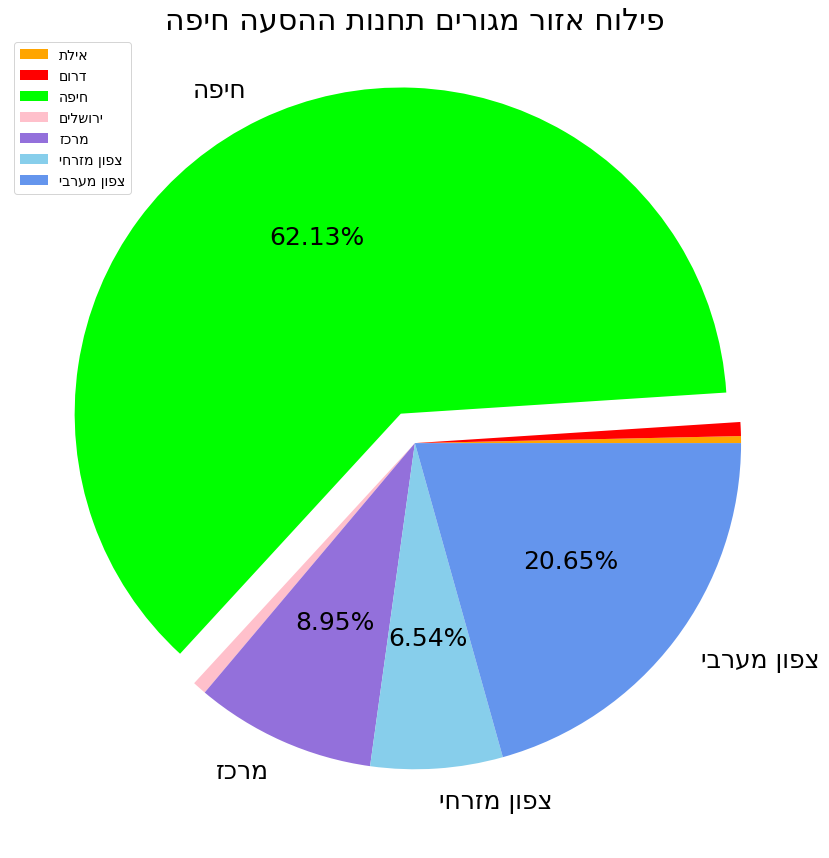

In [12]:
henionim_haifa = ['חניון חוף זמיר חיפה', 'חוף הכרמל חיפה','לב המפרץ חיפה']

df = all_data[(all_data[all_data.columns[5]].isin(henionim_haifa))]
df1 = df[df.columns[48]].value_counts().sort_index()
labels = df1.index
sizes = df1.values

labels= [label[::-1] for label in labels]
label_dict = dict(zip(labels,df1.values/sum(df1.values)))

colors = dict(zip(labels,my_colors[:1] + my_colors[2:]))
plt.figure(figsize  = (15,15))
plt.pie(sizes, labels=[label if label_dict[label]>0.03  else "" for label in labels],colors = [colors[p] for p in labels],autopct=lambda p: '{:.2f}%'.format(round(p,2)) if p > 3 else '',explode = [0]*2 + [0.1] + [0]*4,textprops={'fontsize': 25})
title_text = 'פילוח אזור מגורים תחנות ההסעה חיפה'
plt.title(title_text[::-1], size=  30)
plt.xticks(rotation = 90,size = 16)
plt.yticks(size = 14)
plt.legend(labels,loc = 'upper left',fontsize = 14)
plt.show()